In [19]:
# Install necessary libraries (only run if not already installed)
!pip install tensorflow gradio opencv-python-headless matplotlib seaborn pillow scikit-learn --quiet

# General imports
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
from PIL import Image
from datetime import datetime

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Sklearn
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Warnings
import warnings
warnings.filterwarnings("ignore")

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


In [20]:
# Define image size and paths
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_path = 'data/train'
val_path = 'data/val'
test_path = 'data/test'

# Define ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20,
                                   zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load datasets
train_data = train_datagen.flow_from_directory(train_path, target_size=IMG_SIZE,
                                               batch_size=BATCH_SIZE, class_mode='categorical')
val_data = val_datagen.flow_from_directory(val_path, target_size=IMG_SIZE,
                                           batch_size=BATCH_SIZE, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_path, target_size=IMG_SIZE,
                                             batch_size=BATCH_SIZE, class_mode='categorical',
                                             shuffle=False)

class_names = list(train_data.class_indices.keys())
print("🗂️ Classes:", class_names)


Found 2400 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
🗂️ Classes: ['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


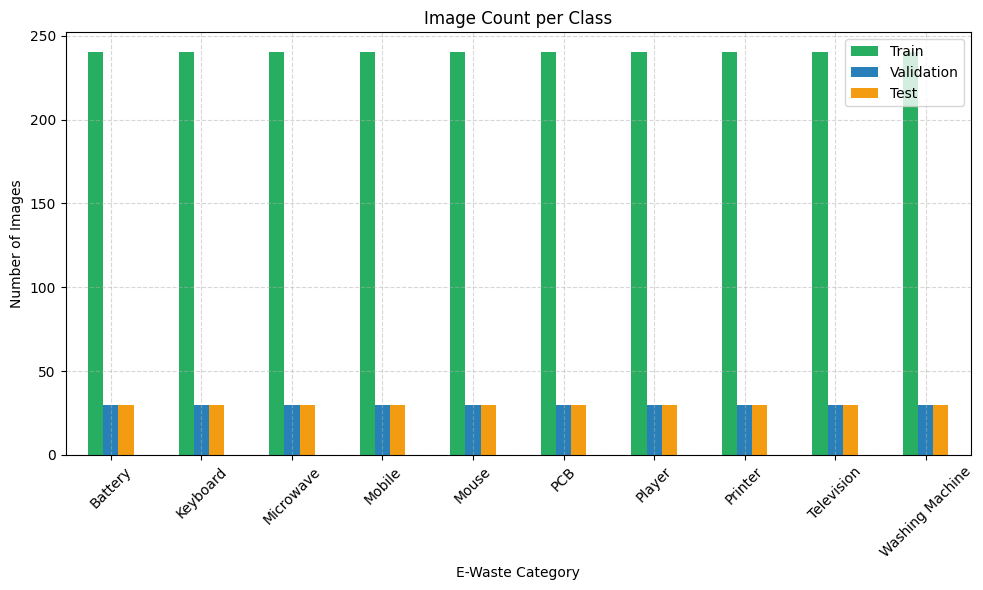

In [21]:
# Count number of images per class in train/validation/test sets
import os
from collections import Counter

def count_images(directory):
    label_counts = {}
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            label_counts[label] = len(os.listdir(label_path))
    return label_counts

train_counts = count_images(train_path)
val_counts = count_images(val_path)
test_counts = count_images(test_path)

# Convert to DataFrame for visualization
df_counts = pd.DataFrame({
    'Train': pd.Series(train_counts),
    'Validation': pd.Series(val_counts),
    'Test': pd.Series(test_counts)
}).fillna(0).astype(int)

df_counts.plot(kind='bar', figsize=(10, 6), color=['#27ae60', '#2980b9', '#f39c12'])
plt.title('Image Count per Class')
plt.xlabel('E-Waste Category')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


This is image of e-waste dataset


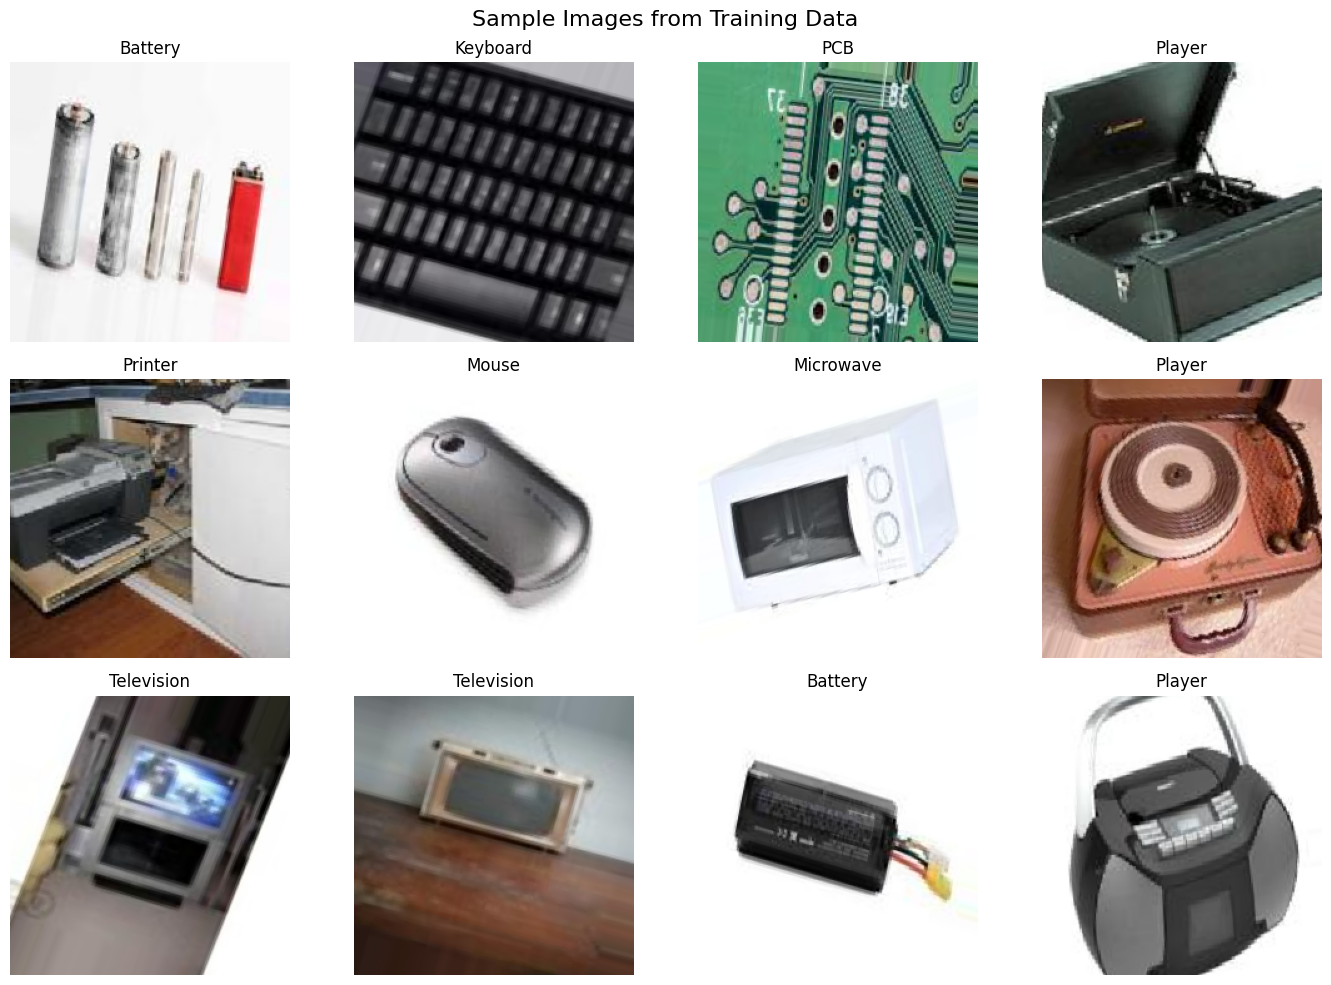

In [22]:
# Display some random images from each class in training set
print("This is image of e-waste dataset")
def show_random_images(data_generator):
    class_indices = data_generator.class_indices
    index_to_label = {v: k for k, v in class_indices.items()}
    images, labels = next(data_generator)
    plt.figure(figsize=(14, 10))
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i])
        plt.title(index_to_label[np.argmax(labels[i])])
        plt.axis("off")
    plt.suptitle("Sample Images from Training Data", fontsize=16)
    plt.tight_layout()
    plt.show()

show_random_images(train_data)
